# Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data collection and Processing

In [2]:
# loading the dataset from the drive
data = pd.read_csv("/content/drive/MyDrive/datasets/loan-predication/train_u6lujuX_CVtuZ9i (1).csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
# statistical data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# number of null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# dropping the missing values
data = data.dropna()
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
data.shape

(480, 13)

In [8]:
data["Loan_Status"].unique()

array(['N', 'Y'], dtype=object)

In [9]:
# label encoding
data.replace({"Loan_Status":{"N": 0, "Y": 1}}, inplace=True)

<ipython-input-9-fae6ac442ae9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({"Loan_Status":{"N": 0, "Y": 1}}, inplace=True)


In [10]:
data["Loan_Status"].unique()

array([0, 1])

In [11]:
# Dependent column values
data["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [12]:
data = data.replace(to_replace='3+', value=4)

In [13]:
data["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data Visualization

<Axes: xlabel='Education', ylabel='count'>

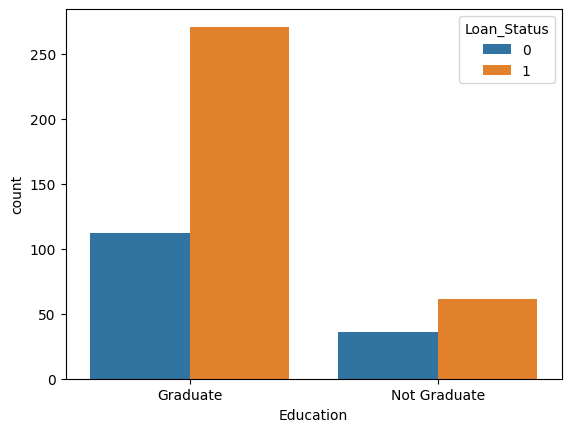

In [14]:
# education and load status
sns.countplot(x="Education", hue="Loan_Status", data=data)

<Axes: xlabel='Married', ylabel='count'>

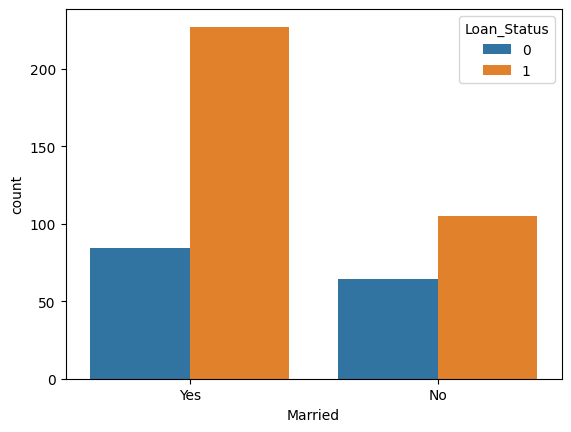

In [15]:
# marital status and load status
sns.countplot(x="Married", hue="Loan_Status", data=data)

In [16]:
# convert categorical columns to numerical values
data.replace({"Married":{"Yes": 1, "No": 0},
              "Gender" : {"Male": 1, "Female": 0},
              "Education": {"Graduate": 1, "Not Graduate": 0},
              "Self_Employed":{"No": 0, "Yes": 1},
              "Property_Area":{"Rural": 0, "Semiurban": 1, "Urban":2}
              }, inplace=True)

In [17]:
data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
136,LP001489,0,1,0,1,0,4583,0.0,84.0,360.0,1.0,0,0
424,LP002364,1,1,0,1,0,14880,0.0,96.0,360.0,1.0,1,1
419,LP002347,1,1,0,1,0,3246,1417.0,138.0,360.0,1.0,1,1
131,LP001473,1,0,0,1,0,2014,1929.0,74.0,360.0,1.0,2,1
15,LP001032,1,0,0,1,0,4950,0.0,125.0,360.0,1.0,2,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 52.5+ KB


<Axes: xlabel='Dependents', ylabel='count'>

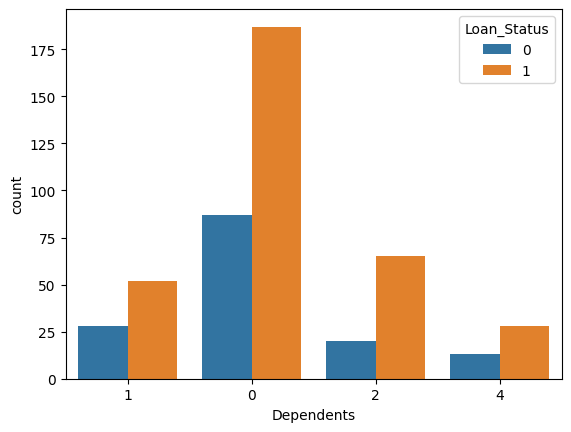

In [19]:
sns.countplot(x="Dependents",hue="Loan_Status",data = data)

In [20]:
#  Separating the data and label
Y = data["Loan_Status"]
X = data.drop(columns=["Loan_Status", "Loan_ID"], axis=1)

In [21]:
# Deviding the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y)
X_train.shape, X_test.shape

((360, 11), (120, 11))

In [22]:
# Training the model
classifier = svm.SVC(kernel="linear")

In [23]:
# training the model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [24]:
# Evaluating the model
X_train_prediction = classifier.predict(X_train)
accuracy_score(Y_train, X_train_prediction)

0.7944444444444444

In [25]:
# Evaluating the model with the test data
X_test_prediction = classifier.predict(X_test)
accuracy_score(Y_test, X_test_prediction)

0.7666666666666667

In [34]:
X_test.head(1)
input = {
    "Gender":[1],
    "Married":[1],
    "Dependents":[2],
    "Education":[1],
    "Self_Employed":[0],
    "ApplicantIncome":[3100],
    "CoapplicantIncome":[1400],
    "LoanAmount":[113],
    "Loan_Amount_Term":[360],
    "Credit_History":[1],
    "Property_Area":[2]
}

input_pd = pd.DataFrame(input)
classifier.predict(input_pd)

array([1])

In [27]:
import pickle

pickle.dump(classifier, open("model.pkl", "wb"))
pickle.dump({"Married":{"Yes": 1, "No": 0},
              "Gender" : {"Male": 1, "Female": 0},
              "Education": {"Graduate": 1, "Not Graduate": 0},
              "Self_Employed":{"No": 0, "Yes": 1},
              "Property_Area":{"Rural": 0, "Semiurban": 1, "Urban":2},
              "Loan_Status":{"N": 0, "Y": 1}
             }, open("replace.pkl", "wb"))